<a href="https://colab.research.google.com/github/PilarAriasVazquez/Quantum-Machine-Learning/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# VQC (Variatonal Quantum Circuits)

Main concepts:
-
- VQC: Quantum computing hybrid model that is design to work on actuals quantum computers (NISQ).
- Quantum Feature Map: Mathematical map that embeds classical data into a quantum state (qubits rotations)
- Ansatz: Basic Architecture of a circuit. Logic doors with  $\theta$ values to optimize
- Expectation Value: Measure with respect to the Z axis several times and we will return the value of the probability that it is 0 - the probability that it is 1 [P(0) - P(1)]. Equivalent to forward pass.
- Parameter Shift Rule: The quantums backpropagation.


Libraries:
- Pennylane: Open-source Python framework for quantum programming.

En esencia, un VQC es el equivalente a una capa de una Red Neuroanl, donde las neuronas son sustituidas por rotaciones de qubits. Los pesos y bias que se ajustan en Deep Learning clásico, es lo equivalente al ajuste de ángulos de las puertas lógicas cuánticas. Encontramos 3 bloques:
1. Encoding -> Se pasa de un vector de características, al espacio de Hilbert. Se aplican puertas de rotación donde el ángulo es igual al valor del dato. No tiene parámetros entrenables.
2. Ansatz -> Los parámetros que se entrenan $\theta$. Suelen estar entrelazadas mediante puertas CNOT. Así, gracias a este entrelazamiento, los qubits comparten información de una manera que las neuronas clásicas no pueden. Algunos de los puntos positivos de esta característica, se basan en encontrar correlaciones no locales, es decir, representar correlaciones extremadamente complejas. Así como los problemas con la dimensionalidad limitada, pues, graicas al entrelazamiento y superposición, mientras un sistema clásico representa uno de los 2^n estados posibles a la vez, en un sistema cuántico se puede llegar a explorar esos 2^n estados simultáneamente.
3. Medida -> Colapsa el estado cuántico en valores clásicos. El valor esperado (normalmente entre -1 y 1). Este es el valor que espera la función de pérdiuda estándar.

Es variacional pues gracias a un optimizador clásico, los parámetros $\theta$ iteran hasta minimizar la pérdida, no se resuelve una ecuación cuántica compleja del tirón. Es un bucle híbrido:
1. Hardware cuántico: Ejecuta el circuito con unos parámetros $\theta$ y mide el resultado.
2. Hardware clásico: Recibe el resultado, calcula el gradiente y actualiza $\theta$ para la siguiente iteración.


Es decir, los VQC son modelos de kernel implícitos, en los que al pasar los datos por el paso 1 (encoding), se proyectan a una dimensión infinita en el espacio de Hilbert, y el paso 2 busca el hiperplano óptimo en ese espacio masivo para clasificar los datos.

In [6]:
!pip install pennylane --upgrade

In [11]:
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt

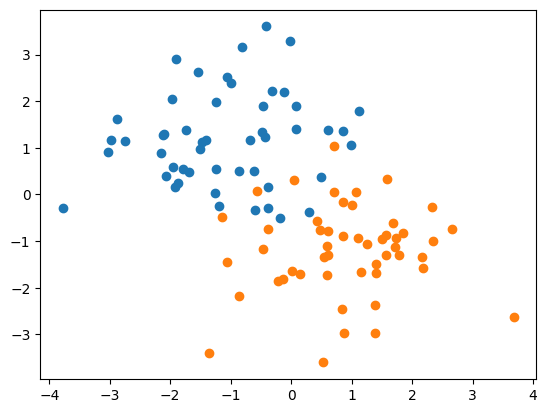

In [16]:
n_samples = 100
A = np.array([[np.random.normal(loc = -1), np.random.normal(loc = 1)] for i in range(n_samples//2)])
B = np.array([[np.random.normal(loc = 1), np.random.normal(loc = -1)] for i in range(n_samples//2)])
plt.scatter(A[:,0], A[:,1])
plt.scatter(B[:,0], B[:,1])
plt.show()